In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [41]:
data = pd.read_csv("../data/crabs.csv") 
print(data.head(10))

   Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0           1  B   M      1   8.1   6.7  16.1  19.0   7.0
1           2  B   M      2   8.8   7.7  18.1  20.8   7.4
2           3  B   M      3   9.2   7.8  19.0  22.4   7.7
3           4  B   M      4   9.6   7.9  20.1  23.1   8.2
4           5  B   M      5   9.8   8.0  20.3  23.0   8.2
5           6  B   M      6  10.8   9.0  23.0  26.5   9.8
6           7  B   M      7  11.1   9.9  23.8  27.1   9.8
7           8  B   M      8  11.6   9.1  24.5  28.4  10.4
8           9  B   M      9  11.8   9.6  24.2  27.8   9.7
9          10  B   M     10  11.8  10.5  25.2  29.3  10.3


# CLASSIFICATION SUR L'ESPECE

In [5]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,4:].values
x

array([[ 8.1,  6.7, 16.1, 19. ,  7. ],
       [ 8.8,  7.7, 18.1, 20.8,  7.4],
       [ 9.2,  7.8, 19. , 22.4,  7.7],
       [ 9.6,  7.9, 20.1, 23.1,  8.2],
       [ 9.8,  8. , 20.3, 23. ,  8.2],
       [10.8,  9. , 23. , 26.5,  9.8],
       [11.1,  9.9, 23.8, 27.1,  9.8],
       [11.6,  9.1, 24.5, 28.4, 10.4],
       [11.8,  9.6, 24.2, 27.8,  9.7],
       [11.8, 10.5, 25.2, 29.3, 10.3],
       [12.2, 10.8, 27.3, 31.6, 10.9],
       [12.3, 11. , 26.8, 31.5, 11.4],
       [12.6, 10. , 27.7, 31.7, 11.4],
       [12.8, 10.2, 27.2, 31.8, 10.9],
       [12.8, 10.9, 27.4, 31.5, 11. ],
       [12.9, 11. , 26.8, 30.9, 11.4],
       [13.1, 10.6, 28.2, 32.3, 11. ],
       [13.1, 10.9, 28.3, 32.4, 11.2],
       [13.3, 11.1, 27.8, 32.3, 11.3],
       [13.9, 11.1, 29.2, 33.3, 12.1],
       [14.3, 11.6, 31.3, 35.5, 12.7],
       [14.6, 11.3, 31.9, 36.4, 13.7],
       [15. , 10.9, 31.4, 36.4, 13.2],
       [15. , 11.5, 32.4, 37. , 13.4],
       [15. , 11.9, 32.5, 37.2, 13.6],
       [15.2, 12.1, 32.3,

In [6]:
# Sélection de la variable catégorielle et conversion en format vertical
y = data.iloc[:,1:3].values
y

array([['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'M'],
       ['B', 'F'],
       ['B', 'F'],
       ['B',

### NORMALISATION DES DONNEES

In [7]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [8]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1) = CENTRAGE ET REDUCTION
Z = StandardScaler().fit_transform(x)
Z

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [9]:
# Import de la librairie ACP
from sklearn.decomposition import PCA

In [10]:
acp = PCA(svd_solver="full")

In [11]:
coord = acp.fit_transform(Z)
print(coord)

[[ 4.92757315e+00 -2.68445304e-01 -1.22257753e-01 -3.91439243e-02
   6.94690736e-02]
 [ 4.38617639e+00 -9.40735865e-02 -3.92318876e-02  5.46722132e-03
  -3.05223735e-03]
 [ 4.12866384e+00 -1.68875924e-01  3.36436339e-02  3.80969011e-02
   3.80608040e-02]
 [ 3.88368111e+00 -2.46008318e-01  1.45010217e-02  1.90937313e-02
   1.31497227e-03]
 [ 3.83405492e+00 -2.24166269e-01 -1.50673107e-02  5.46338755e-02
  -2.48839505e-02]
 [ 2.95295511e+00 -2.20020733e-01  3.84281487e-02 -6.98405039e-02
   1.89739068e-02]
 [ 2.67844235e+00  3.90230788e-02  8.17102623e-02 -3.25698384e-02
  -3.70920988e-02]
 [ 2.54843778e+00 -3.63383179e-01  6.25916514e-02 -1.60249677e-02
   4.16485833e-02]
 [ 2.58517895e+00 -1.17037655e-01  6.23383966e-02  1.45688378e-01
  -9.88150747e-03]
 [ 2.20585873e+00  7.91663049e-02  1.56973513e-01  9.06527620e-03
   1.69554776e-04]
 [ 1.75857717e+00 -1.02981368e-02  3.02371578e-01 -1.91747394e-02
  -3.00907285e-02]
 [ 1.68388431e+00  3.82340303e-02  1.93104441e-01 -1.10166168e-01

In [12]:
#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


### ANALYSE DE L'INFORMATION RETENUE

In [13]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [14]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.9577669568722968, 0.030337041349040424, 0.009326594818043316, 0.0022270714294888366, 0.00034233553113074776]


In [15]:
#ICI, on peut se permettre de ne regarder que les deux premières composantes

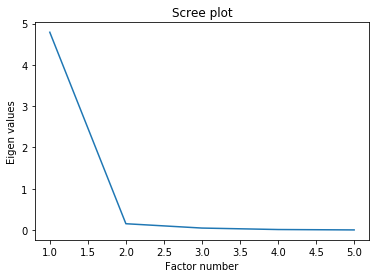

In [16]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

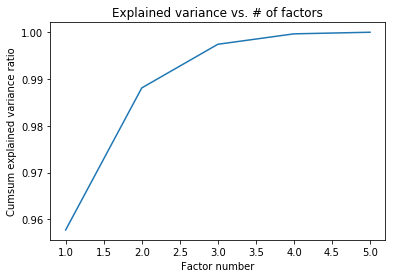

In [17]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [18]:
#On confirme ici le fait que seules les deux composantes principales suffisent à conclure vis-à-vis des données

### REPRESENTATION GRAPHIQUE DES DONNEES

In [19]:
#On se permet de ne récupérer que les deux premières composantes principales
#Pour cela on peut refaitre l'analyse en ne gardant que deux composantes principales ou récupérer ces données à 
#partir de la matrice coord

In [20]:
principalComponents = coord[:,0:2]
print(principalComponents)

[[ 4.92757315e+00 -2.68445304e-01]
 [ 4.38617639e+00 -9.40735865e-02]
 [ 4.12866384e+00 -1.68875924e-01]
 [ 3.88368111e+00 -2.46008318e-01]
 [ 3.83405492e+00 -2.24166269e-01]
 [ 2.95295511e+00 -2.20020733e-01]
 [ 2.67844235e+00  3.90230788e-02]
 [ 2.54843778e+00 -3.63383179e-01]
 [ 2.58517895e+00 -1.17037655e-01]
 [ 2.20585873e+00  7.91663049e-02]
 [ 1.75857717e+00 -1.02981368e-02]
 [ 1.68388431e+00  3.82340303e-02]
 [ 1.74282949e+00 -3.62089809e-01]
 [ 1.77573850e+00 -2.44730446e-01]
 [ 1.65026614e+00 -8.20012474e-03]
 [ 1.64056281e+00  2.83574124e-02]
 [ 1.56438534e+00 -1.73623511e-01]
 [ 1.47581648e+00 -9.02085974e-02]
 [ 1.44098122e+00 -1.46732285e-02]
 [ 1.11074684e+00 -1.76130471e-01]
 [ 6.35856632e-01 -1.93317096e-01]
 [ 4.24937531e-01 -4.30858716e-01]
 [ 5.37722022e-01 -5.29025157e-01]
 [ 3.12960262e-01 -3.86139480e-01]
 [ 2.01969552e-01 -2.70035545e-01]
 [ 1.84174275e-01 -1.88895319e-01]
 [ 1.17640671e-01 -3.46595294e-01]
 [-5.13075476e-01 -3.18322209e-01]
 [-3.20760847e-01 -1

In [21]:
#On remet les résultats de l'ACP sur les deux premières CP sous forme de DataFrame (POUR VISUALISATION)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(10)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074
2         4.128664        -0.168876
3         3.883681        -0.246008
4         3.834055        -0.224166
5         2.952955        -0.220021
6         2.678442         0.039023
7         2.548438        -0.363383
8         2.585179        -0.117038
9         2.205859         0.079166

In [22]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(10)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B
2         4.128664        -0.168876  B
3         3.883681        -0.246008  B
4         3.834055        -0.224166  B
5         2.952955        -0.220021  B
6         2.678442         0.039023  B
7         2.548438        -0.363383  B
8         2.585179        -0.117038  B
9         2.205859         0.079166  B

#### REMARQUE

In [23]:
#On aurait pû récupérer la première colonne de y et la concaténer à coord[:,0:2] pour ensuite convertir le tout en DATAFRAME

#### SUITE

In [24]:
#Prise de connaissance des attributs uniques
finaldf.sp.unique()

array(['B', 'O'], dtype=object)

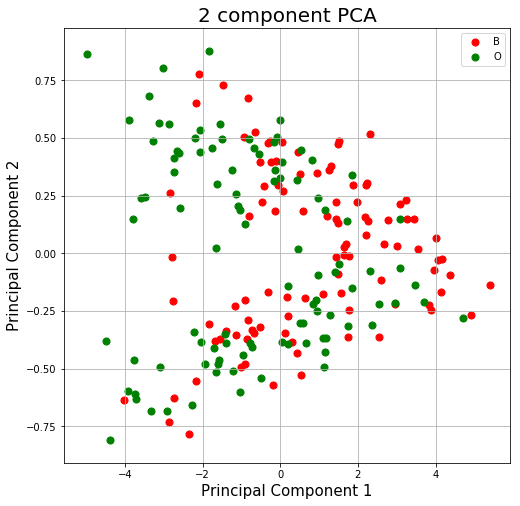

In [25]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# CLASSIFICATION SUR L'ESPECE

In [26]:
#ICI, on refait la même analyse que ci-dessus et on trace le même graphe à la différence près qu'on sélectionne une autre
#variable qualitative pour colorer (et donc différencier) les données

In [39]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf.head(10)

Axe principal 1  Axe principal 2 sex
0         4.927573        -0.268445   M
1         4.386176        -0.094074   M
2         4.128664        -0.168876   M
3         3.883681        -0.246008   M
4         3.834055        -0.224166   M
5         2.952955        -0.220021   M
6         2.678442         0.039023   M
7         2.548438        -0.363383   M
8         2.585179        -0.117038   M
9         2.205859         0.079166   M

In [28]:
#Prise de connaissance des attributs uniques
finaldf.sex.unique()

array(['M', 'F'], dtype=object)

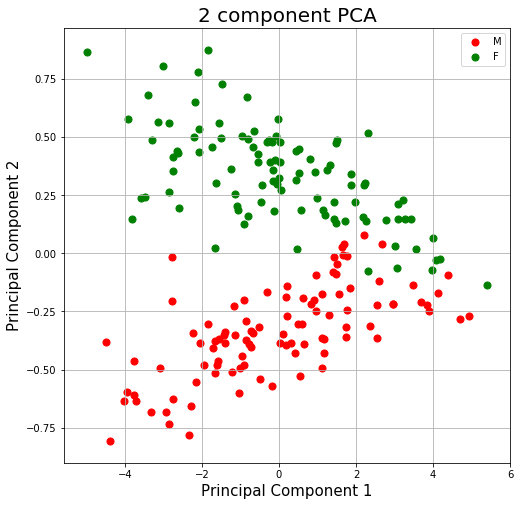

In [29]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [30]:
#Ici on remarque bien que deux groupes disctincts apparaissent : on peut classer les variables en fonction de leur sexe
#ie faire deux groupes de données
#CONSLUSION : les attributs des crabes diffèrent selon leur sexe

# ANALYSE SUR DES DONNEES CROISEES

In [31]:
#Nous devons faire ressortir les données en tenant compte de leur sexe, mais également de leur couleur
#Pour se faire, on se propose (sur les précieux conseils reçus en TD) de créer une nouvelle colone variable combinant les 
#valeurs qualitatives des variables sp & sex
#Ainsi on attribuera la valeur MO pour un mâle orange, FB pour une femelle bleue (et pas Facebook ;) )

In [49]:
sp=[y[i][0] for i in range(len(y))]
sex = [y[i][1] for i in range(len(y))]
if len(sp)==len(sex):
    new_var=[(sp[i] + sex[i]) for i in range(len(sp))]
print(len(new_var))
print(new_var)

200
['BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BM', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OM', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF', 'OF',

In [50]:
#Création de la colonne de la nouvelle variable

new_var_df = pd.DataFrame(data = new_var, columns = ['sp_sex'])
new_var_df.head(10)

sp_sex
0     BM
1     BM
2     BM
3     BM
4     BM
5     BM
6     BM
7     BM
8     BM
9     BM

In [51]:
#Concaténation des deux DataFrame
finaldf = pd.concat([principaldf, new_var_df], axis = 1)
print(finaldf.head(10))

   Axe principal 1  Axe principal 2 sp_sex
0         4.927573        -0.268445     BM
1         4.386176        -0.094074     BM
2         4.128664        -0.168876     BM
3         3.883681        -0.246008     BM
4         3.834055        -0.224166     BM
5         2.952955        -0.220021     BM
6         2.678442         0.039023     BM
7         2.548438        -0.363383     BM
8         2.585179        -0.117038     BM
9         2.205859         0.079166     BM


In [52]:
finaldf.sp_sex.unique()

array(['BM', 'BF', 'OM', 'OF'], dtype=object)

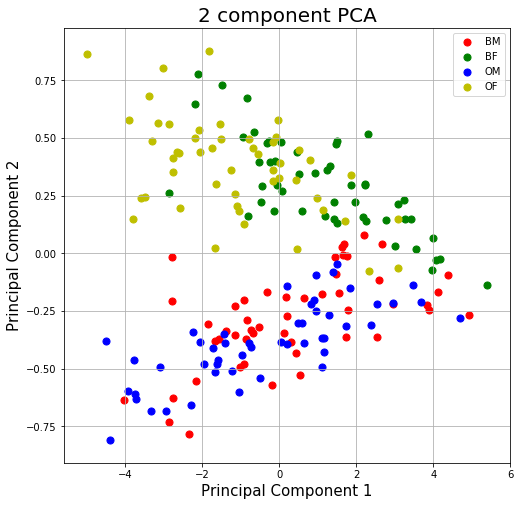

In [54]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['BM', 'BF', 'OM', 'OF']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp_sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()